In [61]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model('Models')
from PIL import ImageTk, Image, ImageDraw
import PIL
from PIL import ImageGrab, Image
from tkinter import *
import tkinter as tk
import win32gui

import numpy as np
import matplotlib.pyplot as plt
class_names = ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']

In [34]:
width = 45  # canvas width
height = 45 # canvas height
center = width/2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.png"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=2)
    draw.line([x1, y1, x2, y2],fill="black",width=2)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

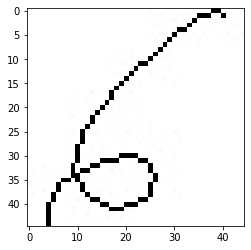

In [49]:
from PIL import Image
from numpy import asarray
import cv2
image =cv2.imread('user_input.jpg')
plt.imshow(image)
plt.show()


In [52]:
img = tf.keras.utils.load_img(
        'user_input.jpg', target_size=(45,45)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 11ms/step


array([[-57.805695  ,  -2.614598  , -57.964817  , -21.527517  ,
         -2.4638927 ,  -5.056945  , -21.345404  , -17.097486  ,
        -12.195206  , -12.145715  ,  -9.633771  ,   3.9228888 ,
         27.75467   , -34.961452  ,   6.534588  , -57.877865  ,
        -19.227863  , -10.222681  ,  -7.6172876 , -28.312809  ,
        -14.787352  ,  -3.1889179 , -58.240314  , -14.114962  ,
         -0.55785155,   4.3108506 ,   2.3839855 ,  -8.959623  ,
        -18.47404   , -55.16334   , -22.674051  , -30.118309  ,
          5.6054626 , -30.607344  , -32.571514  ,   7.3494315 ,
        -20.541904  , -25.784616  , -59.582565  ,   8.85678   ,
        -49.25645   ,  -8.055173  , -12.4857855 , -47.852055  ,
        -41.437027  , -15.454782  , -32.31807   , -18.462011  ,
        -20.579437  ,  -4.1282396 ,  -6.8460016 , -19.867146  ,
        -49.565296  , -75.75778   ,   1.1591585 , -14.110049  ,
        -34.79807   , -23.860006  , -53.341618  , -57.000298  ,
        -43.041107  , -39.9666    , -36.

In [53]:
score = tf.nn.softmax(predictions_array[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
score

This image most likely belongs to b with a 45.80 percent confidence.


<tf.Tensor: shape=(82,), dtype=float32, numpy=
array([6.56892947e-20, 2.93396323e-14, 2.51882346e-16, 1.51525459e-11,
       6.09957098e-08, 6.74850682e-08, 8.44385454e-07, 1.68067793e-09,
       7.49583062e-09, 2.11846796e-07, 1.79765022e-10, 2.18532068e-06,
       6.15366048e-07, 3.85649956e-09, 2.04828531e-01, 1.40108869e-09,
       8.45155922e-14, 1.30344515e-05, 8.20968182e-09, 1.42697709e-09,
       2.97061503e-02, 1.97278660e-09, 1.94787475e-08, 3.79055962e-07,
       5.32927061e-06, 3.16898596e-09, 7.93562178e-12, 9.70998357e-08,
       1.40051711e-20, 1.35290593e-14, 5.99342265e-09, 3.38111142e-20,
       4.58010942e-01, 2.27792878e-02, 4.31087743e-09, 6.42608056e-09,
       1.31959164e-17, 1.47674456e-07, 1.09096141e-12, 2.44969169e-06,
       1.28639135e-08, 2.48142769e-17, 6.53457346e-06, 2.79765011e-09,
       1.81781543e-12, 6.74297857e-14, 1.29997209e-23, 7.67018870e-02,
       3.47181471e-22, 8.81250406e-10, 7.69956168e-05, 4.39542310e-13,
       4.53378139e-13, 3.05994

In [73]:
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((45,45))
    #convert rgb to grayscale
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,45,45,3)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()

1/1 [==============================] - 0s 11ms/step
